<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/davichi_thislove_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

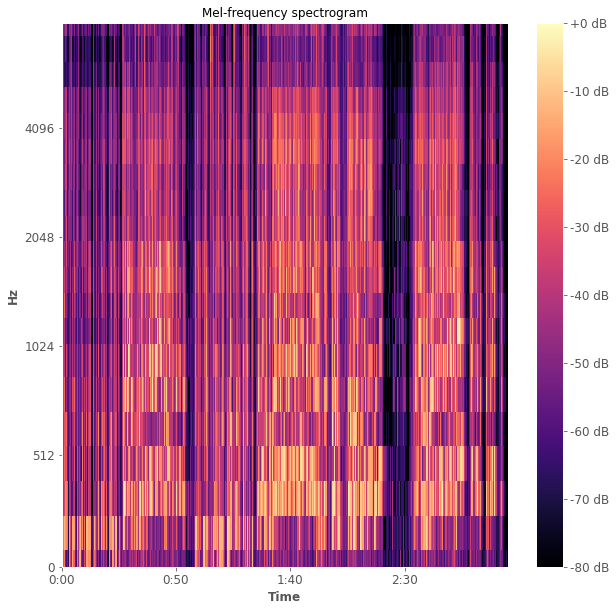

In [277]:
y,sr = librosa.load('this_love.mp3')
dur_time = librosa.get_duration(y,sr=sr)
time_sec = round(dur_time)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
#plt.xlim(60,120)

In [327]:
start = 0 
end = time_sec 
time_series_sec = np.linspace(start,end,len(S_dB[0]))

In [328]:
print(end)

195


In [359]:
data = pd.read_csv('thislove.CSV')

In [360]:
print(data)

  speaker minute                                               text  Unnamed: 3
0       K  00:26  f I turn back time, will my memory be erased?\...         NaN
1       L  01:24  But I can't live outside of you\nFor me, only ...         NaN
2       K  01:51  I guess love is like that no matter what I say...         NaN
3       L  02:04  You know, I can't live outside of you\nFor me,...         NaN
4       K  02:32  You know, I can't live outside of you\nFor me,...         NaN
5       L  03:15  You know, I can't live outside of you\nFor me,...         NaN


In [361]:
def convert_to_sec(time_string):
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [362]:
minute_list = data.minute.tolist()

In [363]:
SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
# turn_index = SEC_LIST.index(0)
# print(turn_index)
# to_add = SEC_LIST[turn_index-1]
# for j in range(turn_index,len(SEC_LIST)):
#     SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

In [364]:
data.head()

,speaker,minute,text,Unnamed: 3,Seconds
0,K,00:26,"f I turn back time, will my memory be erased?\...",NaN,26.0
1,L,01:24,"But I can't live outside of you\nFor me, only ...",NaN,84.0
2,K,01:51,I guess love is like that no matter what I say...,NaN,111.0
3,L,02:04,"You know, I can't live outside of you\nFor me,...",NaN,124.0
4,K,02:32,"You know, I can't live outside of you\nFor me,...",NaN,152.0


In [365]:
new_data = data[data.Seconds<=time_series_sec.max()]
new_data.speaker = new_data.speaker.replace({'K:':'K'})

In [366]:
max_sec = new_data.Seconds.max()

In [367]:
print(max_sec)

195.0


In [368]:
new_data.drop_duplicates(subset='speaker')

,speaker,minute,text,Unnamed: 3,Seconds
0,K,00:26,"f I turn back time, will my memory be erased?\...",NaN,26.0
1,L,01:24,"But I can't live outside of you\nFor me, only ...",NaN,84.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


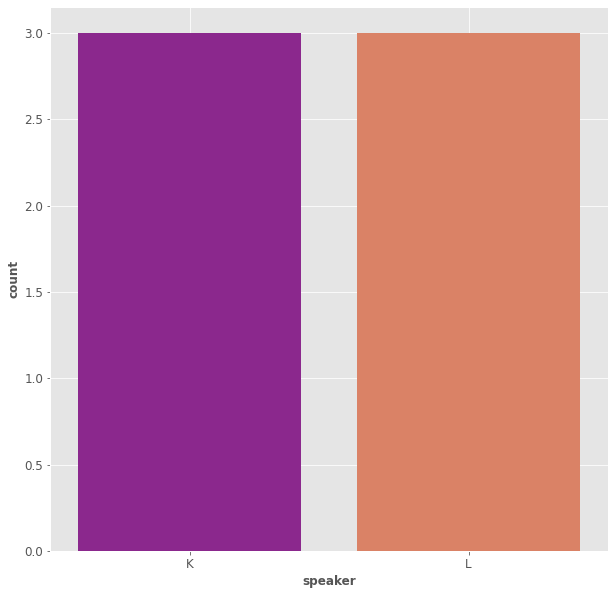

In [369]:
sns.countplot(new_data.speaker,palette='plasma')
plt.grid(True)

In [370]:
audio_data = pd.DataFrame(S_dB)

In [371]:
audio_data = audio_data.T

In [372]:
audio_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
8397,-69.597374,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
8398,-71.440811,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
8399,-74.100502,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
8400,-78.323730,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
8401,-80.000000,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0


In [373]:
import numpy as np
from sklearn.decomposition import PCA

In [374]:
pca = PCA(n_components=4)
pca.fit(audio_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [375]:
pca_data = pd.DataFrame(pca.transform(audio_data))

Text(0, 0.5, 'Second component')

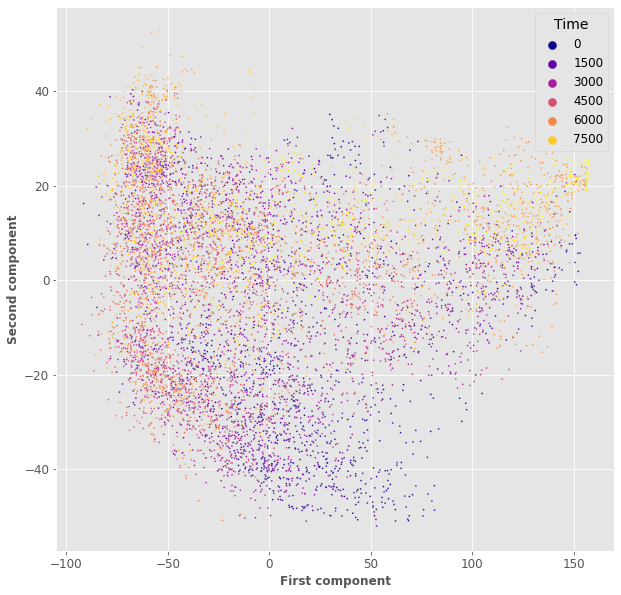

In [376]:
plt.grid(True)
sns.scatterplot(x=pca_data[0],y=pca_data[1],hue=pca_data.index,s=3,palette='plasma')
plt.legend(title='Time')
plt.xlabel('First component')
plt.ylabel('Second component')

In [377]:
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
pca_data['Time']=audio_time
pca_data.head()

,0,1,2,3,Time
0,157.496613,25.152657,5.848300,2.189137,0.000000
1,157.496613,25.152657,5.848300,2.189137,0.023212
2,157.496613,25.152657,5.848300,2.189137,0.046423
3,148.059464,14.469300,0.719861,1.723935,0.069635
4,111.575569,8.742338,8.499631,1.803012,0.092846


In [378]:
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>=start_i and time_j<=end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [379]:
print(pca_data)
print(len(pca_data)-2)
print(len(CLASS))
pca_data['speaker']=CLASS[0:len(pca_data)]

               0          1         2         3        Time
0     157.496613  25.152657  5.848300  2.189137    0.000000
1     157.496613  25.152657  5.848300  2.189137    0.023212
2     157.496613  25.152657  5.848300  2.189137    0.046423
3     148.059464  14.469300  0.719861  1.723935    0.069635
4     111.575569   8.742338  8.499631  1.803012    0.092846
...          ...        ...       ...       ...         ...
8397  156.613174  20.598236  7.816928  3.615062  194.907154
8398  156.769730  21.405319  7.468067  3.362374  194.930365
8399  156.995605  22.569773  6.964740  2.997800  194.953577
8400  157.354263  24.418760  6.165523  2.418908  194.976788
8401  157.496613  25.152657  5.848300  2.189137  195.000000

[8402 rows x 5 columns]
8400
8402


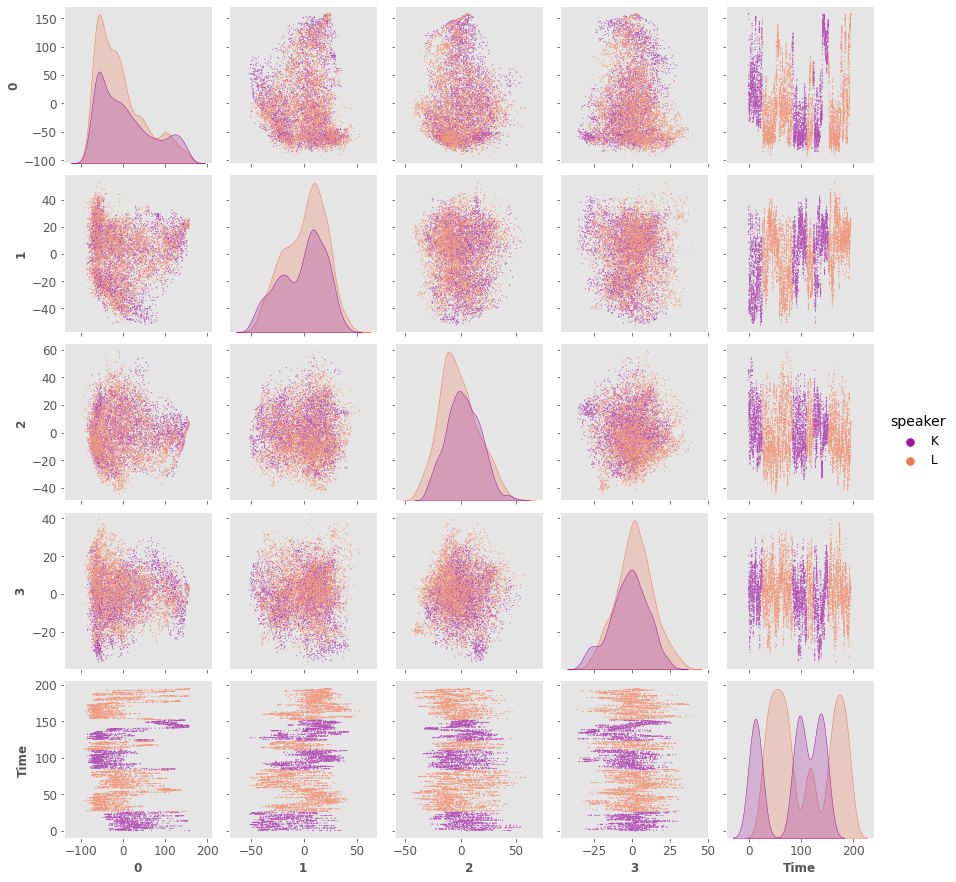

In [380]:
#plt.grid(True)
sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

In [381]:
from sklearn.feature_selection import mutual_info_classif as mi

In [382]:
mi(X=pca_data[['Time',0,1,2,3]],y=pca_data['speaker'])

array([0.67777309, 0.00483535, 0.00968751, 0.02209316, 0.01571204])

In [383]:
time_series_data = pca_data[['Time',2,'speaker']]

In [384]:
time_series_data = time_series_data.rename(columns={2:'X'})

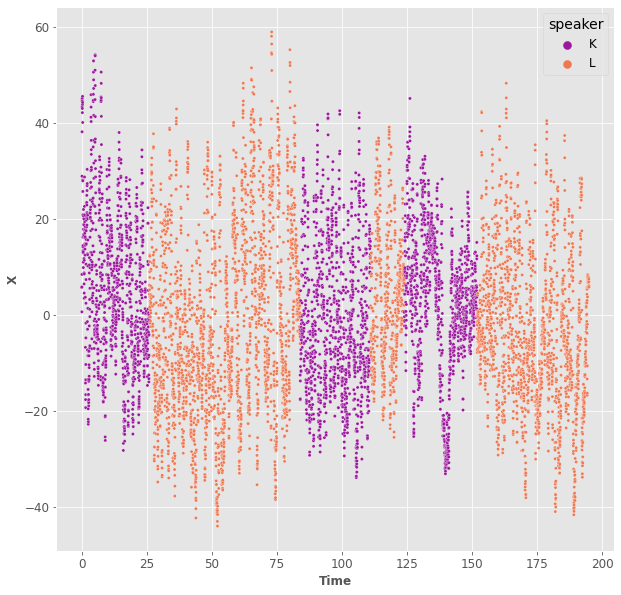

In [385]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [386]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [387]:
time_series_data['speaker']=le.fit_transform(time_series_data.speaker)

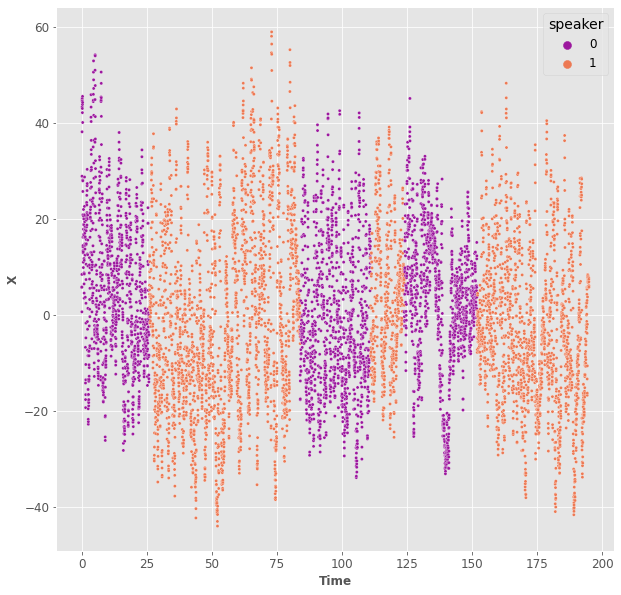

In [388]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [389]:
encod_dic = {0:'K',2:'D',1:'L'}

In [390]:
X=time_series_data[['Time','X']]
y=time_series_data.speaker

In [391]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [392]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [393]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [394]:
num_classes = len(np.unique(y_train))


In [395]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [396]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [397]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)


In [398]:
epochs = 30
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_davichi.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/30
108/108 [==============================] - 2s 6ms/step - loss: 0.3623 - sparse_categorical_accuracy: 0.8296 - val_loss: 1.0173 - val_sparse_categorical_accuracy: 0.5591
Epoch 2/30
108/108 [==============================] - 0s 4ms/step - loss: 0.3087 - sparse_categorical_accuracy: 0.8560 - val_loss: 0.3659 - val_sparse_categorical_accuracy: 0.8119
Epoch 3/30
108/108 [==============================] - 0s 4ms/step - loss: 0.2875 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.2499 - val_sparse_categorical_accuracy: 0.8900
Epoch 4/30
108/108 [==============================] - 0s 4ms/step - loss: 0.3029 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.2253 - val_sparse_categorical_accuracy: 0.8929
Epoch 5/30
108/108 [==============================] - 0s 4ms/step - loss: 0.2918 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.2095 - val_sparse_categorical_accuracy: 0.9019
Epoch 6/30
108/108 [==============================] - 0s 4ms/step - loss: 0.2832 - sparse_categorica

In [399]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

53/53 [==============================] - 0s 1ms/step - loss: 0.1322 - sparse_categorical_accuracy: 0.9673
Test accuracy 0.9672814011573792
Test loss 0.132159024477005


In [400]:
print(x_test)
print(len(x_test))
print(y_test)
print(len(y_test))

[[[ 12.02356862]
  [  5.77121162]]

 [[155.02975836]
  [ -8.80875111]]

 [[  5.40828473]
  [ 17.78559303]]

 ...

 [[  5.01368885]
  [ -4.11839581]]

 [[ 24.09356029]
  [ -9.0338068 ]]

 [[  7.49732175]
  [ 50.61899185]]]
1681
[0 1 0 ... 0 0 0]
1681


In [401]:
encod_dic[0]

'K'

In [402]:
pred_test = pd.DataFrame(model.predict(x_test))

In [403]:
pred_test = pred_test.rename(columns={0:encod_dic[0]})

In [404]:
pred_test = pred_test.rename(columns={1:encod_dic[1]})

In [405]:
pred_test = pred_test.rename(columns={2:encod_dic[2]})

In [406]:
pred_test.head()

,K,L
0,9.975578e-01,0.002442
1,3.748174e-01,0.625183
2,9.988422e-01,0.001158
3,9.527062e-01,0.047294
4,5.404978e-07,0.999999


In [408]:
test_data = X_test.reset_index().drop('index',axis=1)
test_data['target']=y_test
test_data['K']=pred_test['K']
test_data['L']=pred_test['L']
# test_data['D']=pred_test['D']

In [409]:
target_list = test_data.target.tolist()
for t in range(len(target_list)):
    target_list[t]=encod_dic[target_list[t]]

In [410]:
test_data['target']=target_list

In [411]:
test_data = test_data.sort_values(by='Time')

In [412]:
test_data

,Time,X,target,K,L
212,0.185692,44.828552,K,9.976770e-01,0.002323
62,0.394596,28.149620,K,9.990523e-01,0.000948
380,0.441019,25.769171,K,9.991578e-01,0.000842
461,0.533865,14.523106,K,9.994837e-01,0.000516
1323,0.603500,13.220210,K,9.995127e-01,0.000487
...,...,...,...,...,...
1282,194.466135,7.153186,L,2.606547e-09,1.000000
263,194.767885,7.302806,L,2.113481e-09,1.000000
1329,194.814308,7.367794,L,2.042744e-09,1.000000
1666,194.860731,7.196331,L,1.994328e-09,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


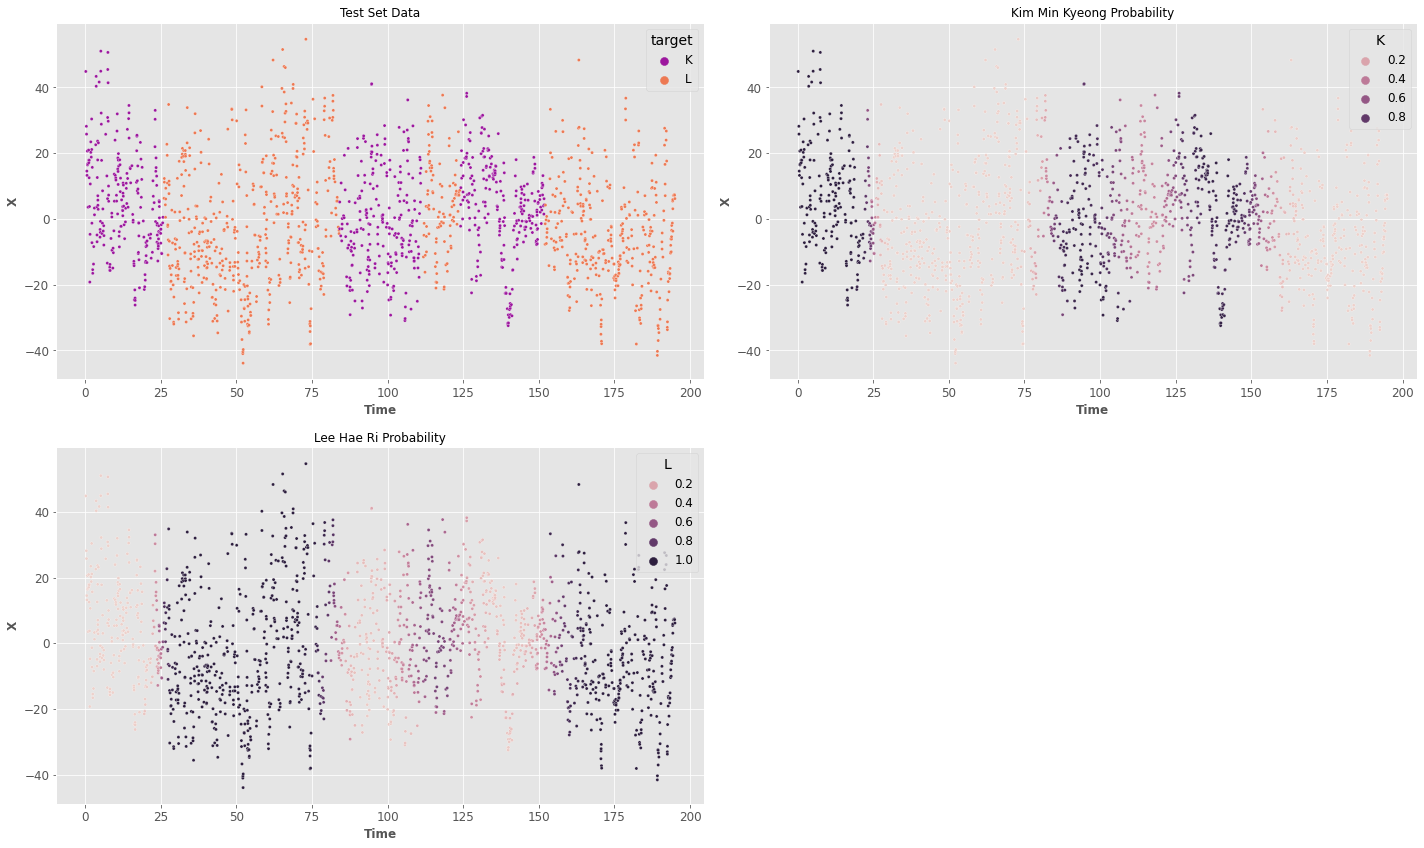

In [414]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('Test Set Data')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data.target,palette='plasma')
plt.grid(True)
plt.subplot(2,2,2)
plt.title('Kim Min Kyeong Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['K'])
plt.grid(True)
plt.subplot(2,2,3)
plt.title('Lee Hae Ri Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['L'])
plt.grid(True)
# plt.subplot(2,2,4)
# plt.title('Duet Probability')
# sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['D'])
# plt.grid(True)
plt.tight_layout()

In [415]:
def model_to_clf(input_data):
    pred_list = model.predict(input_data)
    LIST_PRED = []
    for p in pred_list:
        LIST_PRED.append(np.argmax(p))
    return LIST_PRED

In [416]:
cm=confusion_matrix(model_to_clf(x_test),y_test)

In [425]:
# cm_data = pd.DataFrame(cm,columns=[encod_dic[0],encod_dic[1],encod_dic[2]])
cm_data = pd.DataFrame(cm,columns=[encod_dic[0], encod_dic[2]])

In [426]:
# cm_data.index = [encod_dic[0],encod_dic[1],encod_dic[2]]
cm_data.index = [encod_dic[0],encod_dic[2]]

In [427]:
cm_data

,K,D
K,693,32
D,23,933


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

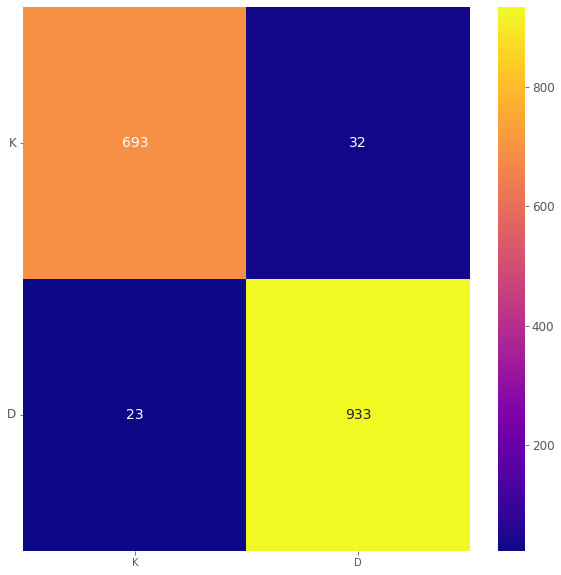

In [428]:
sns.heatmap(cm_data.astype(int), fmt='d', annot=True,cmap='plasma')
plt.yticks(rotation=0)
plt.xticks(rotation=0,fontsize=10)

In [429]:
clf_report = classification_report(y_test,
                                   model_to_clf(x_test),
                                  #  labels= [0,1,2],
                                   labels= [0,1],
                                   target_names= [encod_dic[0],encod_dic[1],encod_dic[2]],
                                   output_dict=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


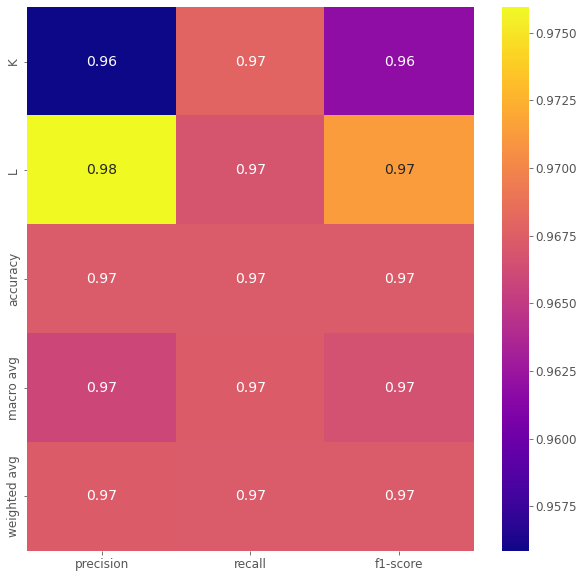

In [430]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='plasma')


In [431]:
!pip install jovian

In [432]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
